Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Figures 3.6, 3.12 and 3.14

Analysis of gross domestic product (GDP) data of world countries\
Topics and relevant videos: [Cumulative distribution function, quantiles, box plot](https://www.youtube.com/watch?v=mR3nc8rW-P4), [probability density function](https://www.youtube.com/watch?v=sSff1uT6Zq4), [histogram, kernel density estimation, nonparametric models](https://www.youtube.com/watch?v=TxB-rbrXMys)

Author: Carlos Fernandez-Granda\
Data source: https://unstats.un.org/unsd/snaama/Downloads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import expon

data_aux = pd.read_csv("../data/GDP_per_capita_US_dollars_2019.csv")
print(data_aux.columns)
data = data_aux['2019'] / 1000.

Index(['CountryID', 'Country', '2019'], dtype='object')


Number of data: 212
Median: 6.52098745
First quartile: 2.18101625
Third quartile: 21.98754875
[178.79945 190.53247]


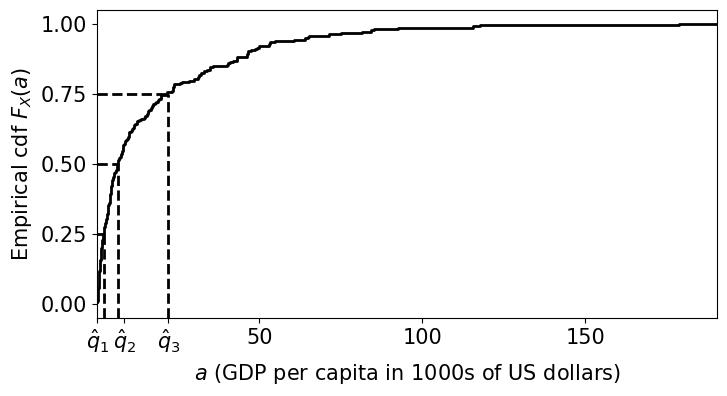

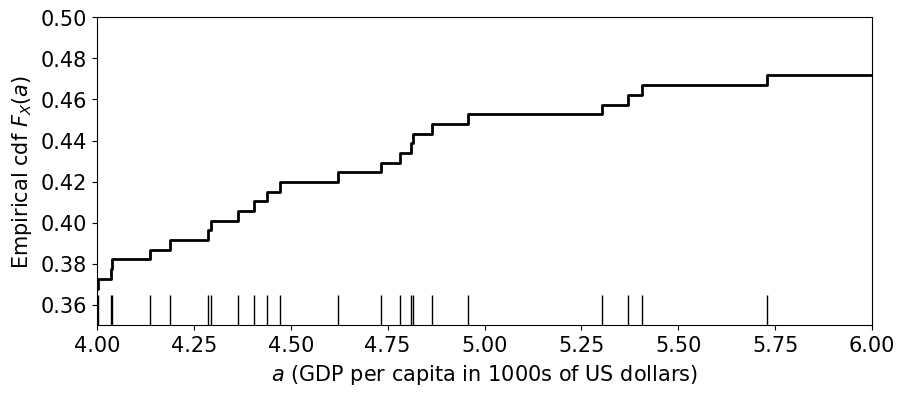

In [4]:
def empirical_cdf(x):
    x_sorted = np.sort(x)
    cdf = np.arange(1, len(x_sorted)+1) / float(len(x_sorted))
    return x_sorted, cdf

sorted_data, cdf = empirical_cdf(data) 

median = np.median(data)
first_quartile = np.percentile(data,25)
third_quartile = np.percentile(data,75)

print("Number of data: " + str(len(data)))
print("Median: " + str(median))
print("First quartile: " + str(first_quartile))
print("Third quartile: " + str(third_quartile))

font_size = 15
font_size_legend = 15
font_size_ticks = 15

x_min = sorted_data[0]
x_max = sorted_data[-1]
print(sorted_data[-2:])
y_min = -0.05
y_max = 1.05
plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.step(sorted_data,cdf,linewidth=2,color="black")
plt.hlines(0.25,x_min,first_quartile,linewidth=2,ls='dashed',color="black")
plt.vlines(first_quartile,y_min,0.25,linewidth=2,ls='dashed',color="black")
plt.hlines(0.5,x_min,median,linewidth=2,ls='dashed',color="black")
plt.vlines(median,y_min,0.5,linewidth=2,ls='dashed',color="black")
plt.hlines(0.75,x_min,third_quartile,linewidth=2,ls='dashed',color="black")
plt.vlines(third_quartile,y_min,0.75,linewidth=2,ls='dashed',color="black")
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$a$ (GDP per capita in 1000s of US dollars)',fontsize=font_size,labelpad=5)
plt.ylabel(r'Empirical cdf $F_{X}(a)$',fontsize=font_size,labelpad=5)
plt.xticks([first_quartile-2,median+2,third_quartile,50,100,150],
          labels=["$\hat{q}_1$","$\hat{q}_2$","$\hat{q}_3$",'50','100','150'])
plt.yticks([0,0.25,0.5,0.75,1])

x_min = 5 - 1
x_max = 5 + 1
y_min = 0.35
y_max = .5
plt.figure(figsize=(10,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.step(sorted_data,cdf,linewidth=2,color="black")
sns.rugplot(data,color="black",height=0.1,lw=2)
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$a$ (GDP per capita in 1000s of US dollars)',fontsize=font_size,labelpad=5)
plt.ylabel(r'Empirical cdf $F_{X}(a)$',fontsize=font_size,labelpad=5);

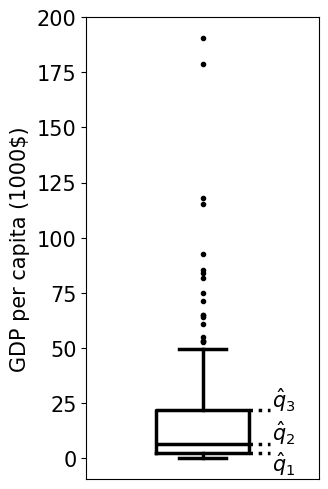

In [5]:
plt.figure(figsize=(3,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
dots = dict(markerfacecolor='black', marker='.')
median_props = dict(color='black', lw=2.5)
plt.ylabel('GDP per capita (1000\$)',fontsize=font_size,labelpad=5)
ax = plt.boxplot( data,flierprops=dots,medianprops=median_props,whiskerprops=median_props,
                 capprops=median_props,boxprops=median_props,widths=0.4)
plt.hlines(first_quartile,1.2,1.29,linewidth=2.5,ls='dotted',color="black")
plt.hlines(median,1.2,1.29,linewidth=2.5,ls='dotted',color="black")
plt.hlines(third_quartile,1.2,1.29,linewidth=2.5,ls='dotted',color="black")
plt.text(1.3,first_quartile-8,r'$\hat{q}_1$',fontsize=font_size_ticks)
plt.text(1.3,median+1.5,r'$\hat{q}_2$',fontsize=font_size_ticks)
plt.text(1.3,third_quartile+1,r'$\hat{q}_3$',fontsize=font_size_ticks)
plt.xticks([]);

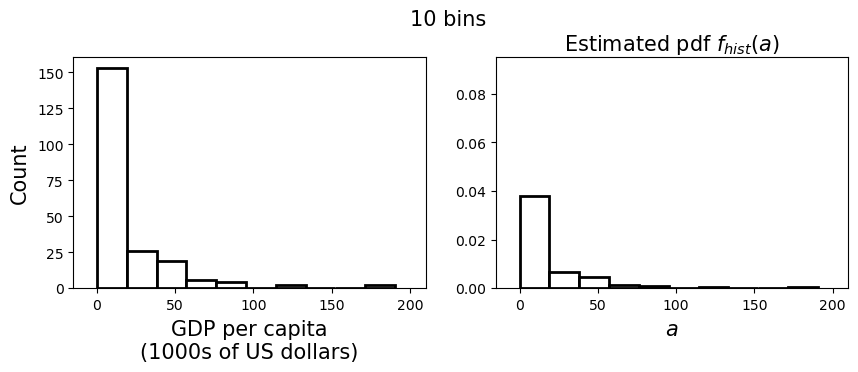

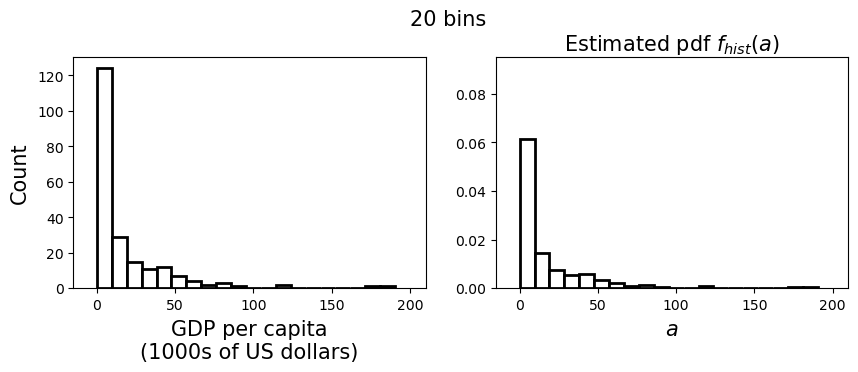

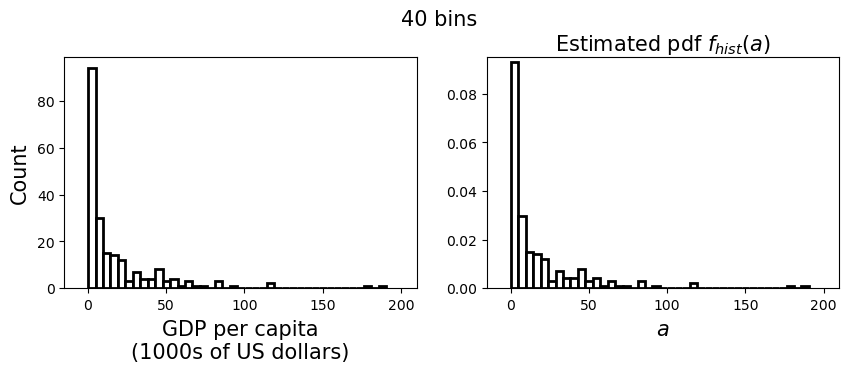

In [13]:
n_bins = [10,20,40]
x_min = -15
x_max = 210
y_max = 0.095

for n in n_bins:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3),width_ratios=[1,1])

    fig.suptitle(str(int(n)) + " bins",fontsize=font_size,y = 1.04)
    
    ax1.set_xticks([0,50,100,150,200]) 
    ax1.hist(data,bins=n,color='white', edgecolor='black',
              linewidth=2)
    ax1.set_xlim([x_min,x_max])
    ax1.set_ylabel("Count",fontsize=font_size,labelpad=5)
    ax1.set_xlabel('GDP per capita\n(1000s of US dollars)',fontsize=font_size,labelpad=5)
    
    ax2.set_xticks([0,50,100,150,200]) 
    ax2.hist(data,bins=n,color='white', edgecolor='black',
              linewidth=2,density=True)
    ax2.set_xlim([x_min,x_max])
    ax2.set_ylim([0,y_max])
    ax2.set_title(r"Estimated pdf $f_{hist}(a)$",fontsize=font_size,pad=5)
    ax2.set_xlabel(r'$a$ ',fontsize=font_size,
               labelpad=5);

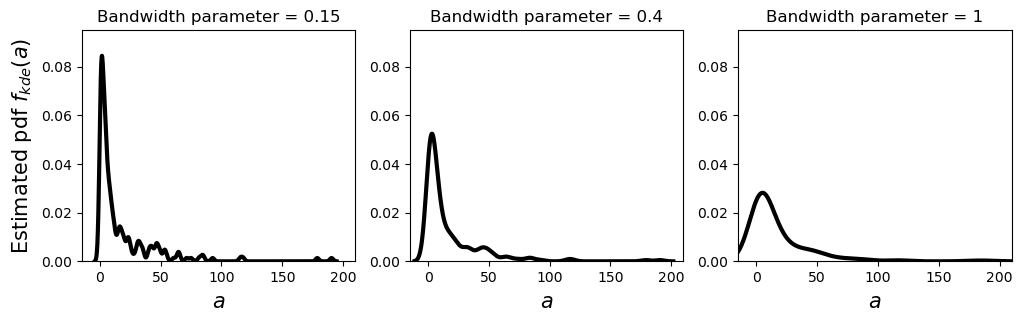

In [18]:
bw_vals = [0.15,0.4,1] 
fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[1,1,1])

for index,bw in enumerate(bw_vals):

    axes[index].set_xticks([0,50,100,150,200])
    sns.kdeplot(data,bw_adjust=bw,color="black",lw=3,gridsize=1000, legend = False,ax=axes[index])#,color='white', edgecolor='black',linewidth=2)
    axes[index].set_xlim([x_min,x_max])
    axes[index].set_ylim([0,y_max])
    if index == 0:
        axes[index].set_ylabel(r"Estimated pdf $f_{kde}(a)$",fontsize=font_size,labelpad=5)
    else:
        axes[index].set_ylabel("")
    axes[index].set_xlabel('$a$',fontsize=font_size,labelpad=5)
    axes[index].set_title("Bandwidth parameter = " + str(bw));